In [1]:
from Bagging_models import *
from Backward_feature_selection import *
import ast

model_types = ['Single RF', 'Single GPR']

all_labels = ['height', 'phi', 'theta', 
                            'impact site x', 'impact site y', 'impact site z', 
                            'impact site r', 'impact site phi', 'impact site theta']

labels_to_predict = ['impact site x', 'impact site y', 'height']
labels_to_predict = ['height']

with_or_without_transformations = 'with'
# with_or_without_transformations = 'without'

Paper2_path = f'/Volumes/Jake_ssd/Paper 2/{with_or_without_transformations}_transformations'
model_folder = Paper2_path + f'/UQ_bagging_models_{with_or_without_transformations}_transformations'
data_folder = Paper2_path + '/5fold_datasets'
results_folder = Paper2_path + '/Compare_Code_5_fold_ensemble_results'
hyperparam_folder = Paper2_path + f'/bayesian_optimization_{with_or_without_transformations}_transformations'

image_folder = '/Users/jakehirst/Desktop/sfx/sfx_ML_data/images_sfx/new_dataset/Visible_cracks'

if(with_or_without_transformations == 'with'):
    full_dataset_pathname = "/Volumes/Jake_ssd/Paper_1_results_WITH_feature_engineering/dataset/feature_transformations_2023-11-16/height/HEIGHTALL_TRANSFORMED_FEATURES.csv"
    backward_feat_selection_results_folder = '/Volumes/Jake_ssd/Paper_1_results_WITH_feature_engineering/results'
else:
    full_dataset_pathname = "/Volumes/Jake_ssd/Paper_1_results_no_feature_engineering/dataset/New_Crack_Len_FULL_OG_dataframe_2023_11_16.csv"
    backward_feat_selection_results_folder = Paper2_path + '/Paper_2_results_WITHOUT_feature_engineering/results' 
    df = pd.read_csv(full_dataset_pathname, index_col=0)
    all_features = df.columns
    all_features = all_features.drop(all_labels)
    all_features = str(all_features.drop('timestep_init').to_list())

    print(all_features)
    
    
'''Only have to uncomment this if the 5 fold datasets have not been made or need to be remade'''
# make_5_fold_datasets(data_folder, full_dataset_pathname, image_folder)

forestci is an optional dependency. To install latest forestci compatabilty with scikit-learn>=0.24, run pip install git+git://github.com/scikit-learn-contrib/forest-confidence-interval.git
XGBoost is an optional dependency. If you want to use XGBoost models, please manually install xgboost package with pip install xgboost. If have error with finding libxgboost.dylib library, dobrew install libomp. If do not have brew on your system, first do ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)" from the Terminal
scikit-lego is an optional dependency, enabling use of the LowessRegression model. If you want to use this model, do "pip install scikit-lego"


'Only have to uncomment this if the 5 fold datasets have not been made or need to be remade'

In [3]:
'''get the appropriate features that each model will use based on backward feature elimination'''
all_features_to_keep = {}

min_features = 1 #minimum number of features you want to select from BFS (backward feature selection)
max_features = 25 #maximum number of features you want to select from BFS
for label in labels_to_predict:
    all_features_to_keep[label] = {}
    for model_type in model_types:
        
        if('ALL_TRANSFORMED_FEATURES' in full_dataset_pathname):
            print('true')
            model_type_hyperparam = model_type.removeprefix('Single ')
            #TODO use code below if using feature selection
            best_features = get_best_features(backward_feat_selection_results_folder, label, model_type_hyperparam, min_features, max_features)
            all_features_to_keep[label][model_type] = best_features
        
        else:
            print('using just the basic features')
            #TODO use code below if NOT using feature selection
            all_features_to_keep[label][model_type] = all_features

print(all_features_to_keep)

true
true
{'height': {'Single RF': "['abs_val_sum_kink * mean_kink', 'abs_val_sum_kink / init z', 'init z / abs_val_sum_kink', 'linearity / abs_val_sum_kink', 'abs_val_sum_kink - avg_prop_speed', 'linearity - abs_val_sum_kink']", 'Single GPR': "['abs_val_sum_kink / abs_val_mean_kink', 'abs_val_sum_kink / avg_prop_speed', 'abs_val_sum_kink + init y', 'dist btw frts + sum_kink', 'abs_val_sum_kink - linearity', 'linearity - abs_val_sum_kink']"}}


In [3]:
'''Now we will make all of the models'''


# def make_UQ_model(training_features, training_labels, model_saving_folder, label_to_predict, num_models, features_to_keep, hyperparam_folder, num_training_points=False, model_type=None): 
#     models = []
#     training_features = training_features[features_to_keep]
#     if(not os.path.exists(model_saving_folder)): os.mkdir(model_saving_folder)

#     if(model_type == 'Single RF'):
#         depth, features, samples_leaf, samples_split, estimators = get_best_hyperparameters_RF(label_to_predict=training_labels.columns[0], hyperparameter_folder=hyperparam_folder)
#         model =  RandomForestRegressor(max_depth=depth, max_features=features, 
#                                        min_samples_leaf = samples_leaf, min_samples_split = samples_split, n_estimators=estimators, random_state=42)
#     elif(model_type == 'Single GPR'):
#         c, length_scale, noise_level = get_best_hyperparameters_GPR(label_to_predict=training_labels.columns[0], hyperparameter_folder=hyperparam_folder)
#         kernel = ConstantKernel(constant_value=c) * RBF(length_scale=length_scale) + WhiteKernel(noise_level=noise_level)
#         model = GaussianProcessRegressor(kernel=kernel, random_state=0, n_restarts_optimizer=25)
    
#     model.fit(training_features, training_labels)
    
#     save_ensemble_model(model, 1, model_saving_folder) 
#     return 



# for fold_no in range(1,6):
#     for model_type in model_types:
#         for label_to_predict in labels_to_predict:
#             print(f'\n$$$$$$$$$$$$$$$$$$$$$$$$$$$$$\ Predicting {label_to_predict} using {model_type} $$$$$$$$$$$$$$$$$$$$$$$$$$$$$\n')
            
#             all_labels = ['height', 'phi', 'theta', 
#                         'impact site x', 'impact site y', 'impact site z', 
#                         'impact site r', 'impact site phi', 'impact site theta']

#             print(f'{data_folder}/{label_to_predict}/fold{fold_no}/train_features.csv')
#             training_features = pd.read_csv(f'{data_folder}/{label_to_predict}/fold{fold_no}/train_features.csv').reset_index(drop=True)
#             training_labels = pd.read_csv(f'{data_folder}/{label_to_predict}/fold{fold_no}/train_labels.csv').reset_index(drop=True)

#             model_saving_folder = f'{model_folder}/{label_to_predict}/{model_type}/1_models/fold_{fold_no}'
#             if(not os.path.exists(model_saving_folder)):
#                 os.makedirs(model_saving_folder)
                
#             results_saving_folder = f'{results_folder}/{label_to_predict}/{model_type}/1_models/fold_{fold_no}'
#             if(not os.path.exists(results_saving_folder)):
#                 os.makedirs(results_saving_folder)
#             # make_dirs(model_saving_folder)
#             # make_dirs(results_saving_folder)

#             '''TODO gotta find out what features to use for each label before testing on new dataset'''
#             features_to_keep = ast.literal_eval(all_features_to_keep[label_to_predict][model_type])
#             print(features_to_keep)
#             make_UQ_model(training_features, training_labels, model_saving_folder, label_to_predict, 1, features_to_keep, hyperparam_folder, model_type=model_type)
#             # make_linear_regression_models_for_ensemble(training_features, training_labels, model_saving_folder, label_to_predict, num_models, features_to_keep, hyperparam_folder, model_type=model_type)


'Now we will make all of the models'

MODEL TYPE = Single RF
LABEL = height
fold 1


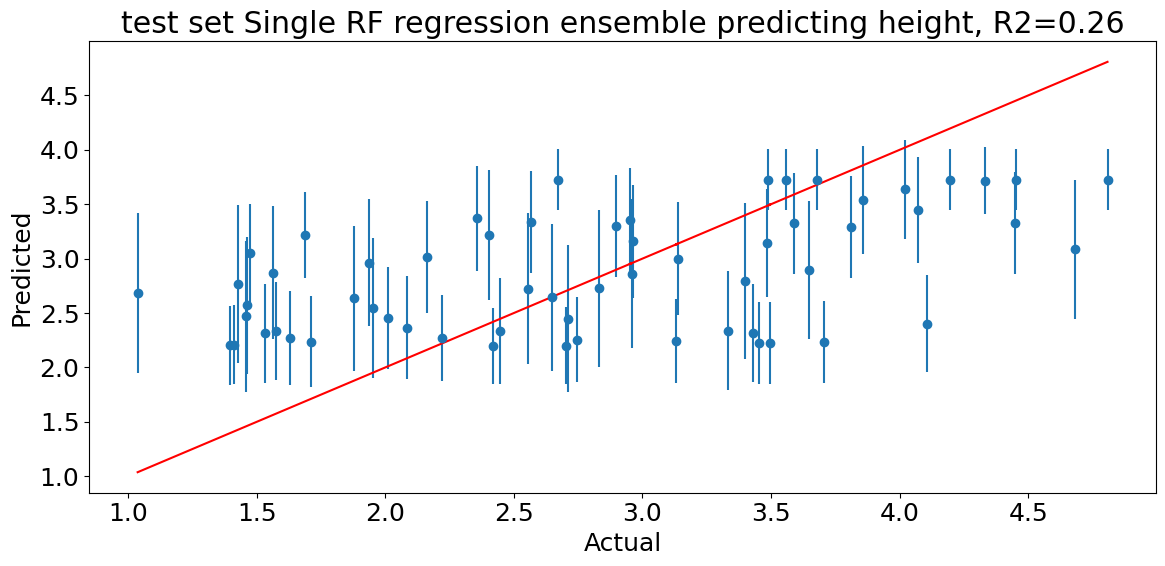

a = 0.6171528591279648 b = 0.57679217457404
Calibration error = 4.02
fold 2
a = 0.6849278387909651 b = 0.5370777181936629
Calibration error = 5.20
fold 3
a = 0.7092288146636339 b = 0.5026745662633335
Calibration error = 3.64
fold 4
a = 0.5742045503600202 b = 0.6192427400067549
Calibration error = 3.25
fold 5
a = 0.5167124070826097 b = 0.6432022424297168
Calibration error = 5.64
MODEL TYPE = Single GPR
LABEL = height
fold 1
a = -3.853541609280204 b = 8.009882279246373
Calibration error = 0.12
fold 2
a = 0.48897356986999385 b = 0.0006392661929130554
Calibration error = 0.47
fold 3
a = 0.48885705471038676 b = 0.0005811086595058439
Calibration error = 0.25
fold 4
a = 0.4899664685130106 b = 0.0005041758399456743
Calibration error = 0.11
fold 5
a = 0.4886777639389024 b = 0.0006444717347621923
Calibration error = 0.52


In [4]:
'''Now we will evaluate the performance of the models'''

'''
predicts the labels of the featureset given, and the uncertainty.
Also compares this to the true labels of the dataset.
'''
def Get_predictions_and_uncertainty(test_features_path, test_labels_path, model_folder, saving_folder, features_to_keep, label_to_predict, model_type):
    if(not os.path.exists(saving_folder)): os.makedirs(saving_folder)
    test_features = pd.read_csv(test_features_path)[features_to_keep]
    test_labels = pd.read_csv(test_labels_path) 

    filename = model_folder + '/model_no1.sav'
    with open(os.path.join(model_folder, filename), 'rb') as file:
        model = pickle.load(file)
    
    # Loop through the pickle files in the folder
    # for filename in os.listdir(model_folder):
    #     if filename.endswith('.sav'):
    #         # Load the model from the pickle file
    #         with open(os.path.join(model_folder, filename), 'rb') as file:
    #             model = pickle.load(file)
    #             models.append(model)
    
    all_model_predictions = []
    # for model in models:
    if(model_type == 'Single RF'): 
        
        tree_predictions = []
        # Iterate over all trees in the random forest
        for tree in model.estimators_:
            # Predict using the current tree
            tree_pred = tree.predict(test_features.to_numpy())
            # Append the predictions to the list
            tree_predictions.append(tree_pred)

        # Convert the list to a NumPy array for easier manipulation if needed
        tree_predictions = np.array(tree_predictions)
        
        # current_predictions = model.predict(test_features.to_numpy()) #COMMENT this is the same as the average of all the individual trees
        current_predictions = np.mean(tree_predictions, axis=0)
        single_pred_stds = np.std(tree_predictions, axis=0)
        
    elif(model_type == 'Single GPR'):
        current_predictions, single_pred_stds = model.predict(test_features.to_numpy(), return_std=True)
        # current_predictions = model.predict(test_features.to_numpy())
            
        # current_predictions = model.predict(test_features.to_numpy())
        current_predictions = current_predictions.reshape(current_predictions.shape[0])
        all_model_predictions.append(current_predictions)

    all_model_predictions = np.array(all_model_predictions)
    
    # ensemble_predictions = []
    # ensemble_uncertanties = []
    # for label_no in range(len(test_labels)):
    #     true_label = test_labels.iloc[label_no][0]
    #     mean_prediction, std_prediction = np.mean(all_model_predictions[:, label_no]), np.std(all_model_predictions[:, label_no])
    #     ensemble_predictions.append(mean_prediction)
    #     ensemble_uncertanties.append(std_prediction*2) #uncertainty will be 2 * the std of the predictions
    
    uncertainties = single_pred_stds * 2
    test_or_train = test_features_path.split('_')[-2].split('/')[-1]
    r2 = parody_plot_with_std(test_labels.to_numpy(), current_predictions, uncertainties, saving_folder, label_to_predict, model_type, testtrain=test_or_train)
    
    return r2, current_predictions, uncertainties, test_labels



for model_type in model_types:
    print(f'MODEL TYPE = {model_type}')
    for label_to_predict in labels_to_predict:
        print(f'LABEL = {label_to_predict}')
        performance_data = []
        for fold_no in range(1,6):
            print(f'fold {fold_no}')

            model_saving_folder = f'{model_folder}/{label_to_predict}/{model_type}/1_models/fold_{fold_no}'
            results_saving_folder = f'{results_folder}/{label_to_predict}/{model_type}/1_models/fold_{fold_no}'
            
            test_features_path = Paper2_path + f'/5fold_datasets/{label_to_predict}/fold{fold_no}/test_features.csv'
            test_labels_path = Paper2_path + f'/5fold_datasets/{label_to_predict}/fold{fold_no}/test_labels.csv'
            train_features_path = Paper2_path + f'/5fold_datasets/{label_to_predict}/fold{fold_no}/train_features.csv'
            train_labels_path = Paper2_path + f'/5fold_datasets/{label_to_predict}/fold{fold_no}/train_labels.csv'


            features_to_keep = ast.literal_eval(all_features_to_keep[label_to_predict][model_type])
            test_r2, test_ensemble_predictions, test_ensemble_uncertanties, test_labels = Get_predictions_and_uncertainty(test_features_path, test_labels_path, model_saving_folder, results_saving_folder, features_to_keep, label_to_predict, model_type)
            train_r2, train_ensemble_predictions, train_ensemble_uncertanties, train_labels = Get_predictions_and_uncertainty(train_features_path, train_labels_path, model_saving_folder, results_saving_folder, features_to_keep, label_to_predict, model_type)


            train_labels_arr = train_labels.to_numpy().T[0]
            train_predictions_arr = np.array(train_ensemble_predictions)
            test_labels_arr = test_labels.to_numpy().T[0]
            test_predictions_arr = np.array(test_ensemble_predictions)
            train_residuals = pd.Series(np.abs(train_labels_arr - train_predictions_arr))
            test_residuals = pd.Series(np.abs(test_labels_arr - test_predictions_arr))

            
            '''getting calibration factors *** linear'''
            cf = CorrectionFactors(train_residuals, pd.Series(train_ensemble_uncertanties))
            a, b = cf.nll()
            print(f'a = {a} b = {b}')
            calibrated_train_uncertainties = pd.Series(a * np.array(train_ensemble_uncertanties) + b, name='train_model_errors')
            calibrated_test_uncertainties = pd.Series(a * np.array(test_ensemble_uncertanties) + b, name='test_model_errors')
            
            '''getting calibration factors *** Nonlinear'''
            # a, b = get_calibration_factors(train_residuals, train_ensemble_uncertanties)
            # print(f'a = {a} b = {b}')
            # calibrated_train_uncertainties = pd.Series(a * (train_ensemble_uncertanties**((b/2) + 1)), name='train_model_errors')
            # calibrated_test_uncertainties = pd.Series(a * (test_ensemble_uncertanties**((b/2) + 1)), name='test_model_errors')

            miscalibration_area, calibration_error = make_calibration_plots(model_type, test_predictions_arr, test_labels_arr, test_ensemble_uncertanties, results_saving_folder)

            
            blank_model_for_plot = SklearnModel('RandomForestRegressor')
            mastml_RVE = Error()

            # mastml_RVE.plot_real_vs_predicted_error_uncal_cal_overlay(savepath=results_saving_folder, 
            #                                                         model=blank_model_for_plot, 
            #                                                         data_type='train', 
            #                                                         model_errors=pd.Series(train_ensemble_uncertanties) ,
            #                                                         model_errors_cal= calibrated_train_uncertainties,
            #                                                         residuals= train_residuals, 
            #                                                         dataset_stdev=np.std(train_labels.to_numpy()), 
            #                                                         show_figure=False,
            #                                                         well_sampled_number=0.025)
            
            
            # mastml_RVE.plot_real_vs_predicted_error_uncal_cal_overlay(savepath=results_saving_folder, 
            #                                                         model=blank_model_for_plot, 
            #                                                         data_type='test', 
            #                                                         model_errors=pd.Series(test_ensemble_uncertanties) ,
            #                                                         model_errors_cal= calibrated_test_uncertainties,
            #                                                         residuals= test_residuals, 
            #                                                         dataset_stdev=np.std(train_labels.to_numpy()), 
            #                                                         show_figure=False,
            #                                                         well_sampled_number=0.025)
            '''using their library to make an rve plot'''
            train_intercept, train_slope, CAL_train_intercept, CAL_train_slope, train_intercept, test_slope, CAL_test_intercept, CAL_test_slope = make_RVE_plots(label_to_predict, model_type, test_ensemble_predictions, test_ensemble_uncertanties, test_labels, train_ensemble_predictions, train_ensemble_uncertanties, train_labels, results_saving_folder, num_bins=15)
            performance_data.append([15, fold_no, train_r2, test_r2, a, b, train_intercept, train_slope, CAL_train_intercept, CAL_train_slope, train_intercept, test_slope, CAL_test_intercept, CAL_test_slope, miscalibration_area, calibration_error])
            
        columns = ['num bins', 'fold_no', 'train R2', 'test R2',  'a', 'b', 'train_intercept', 'train_slope', 'CAL_train_intercept', 'CAL_train_slope', 'train_intercept', 'test_slope', 'CAL_test_intercept', 'CAL_test_slope', 'miscal_area', 'cal_error']
        df = pd.DataFrame(columns=columns)
        for row in performance_data:
            df.loc[len(df)] = row
        average_row = df.mean()
        df = df.append(average_row, ignore_index=True)
            
        results_saving_folder = f'{results_folder}/{label_to_predict}/{model_type}/1_models'
        df.to_csv(results_saving_folder + f'/{label_to_predict}_{model_type}_1results.csv', index=False)